In [235]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [236]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [237]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [238]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [239]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [240]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [241]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [242]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [243]:
# Find the most recent date in the data set.
most_recent=session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent)

('2017-08-23',)


In [263]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017, 8, 23)- dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [259]:
# # Perform a query to retrieve the data and precipitation scores
last_year_data=session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df=pd.DataFrame(last_year_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df=df.sort_values("Date")
df

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


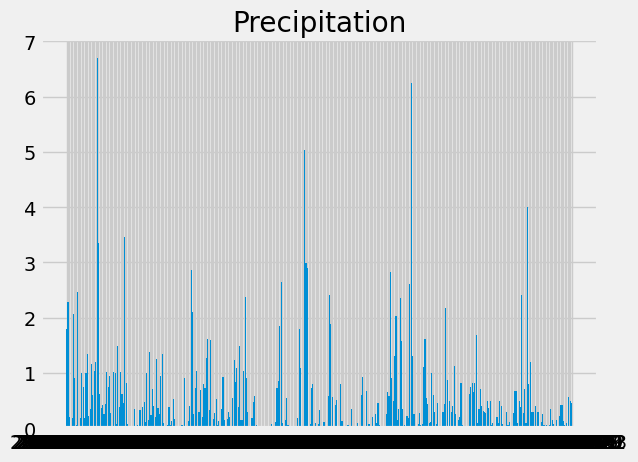

In [251]:
# Use Pandas Plotting with Matplotlib to plot the data

x_axis=df["Date"]
y_axis=df["Precipitation"]
plt.bar(x_axis, y_axis)
plt.title("Precipitation")
plt.show()

In [137]:
# Use Pandas to calculate the summary statistics for the precipitation data
df['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [147]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [160]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.prcp)).\
              group_by(measurement.station).\
              order_by(func.count(measurement.prcp).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [162]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
              filter(measurement.station == 'USC00519281').all()
              

[(54.0, 85.0, 71.66378066378067)]

In [253]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temps=session.query(measurement.tobs).\
            filter(measurement.station == 'USC00519281').\
            filter(measurement.date >= '2016-08-23').all()
temps_df=pd.DataFrame(temps)
temps_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


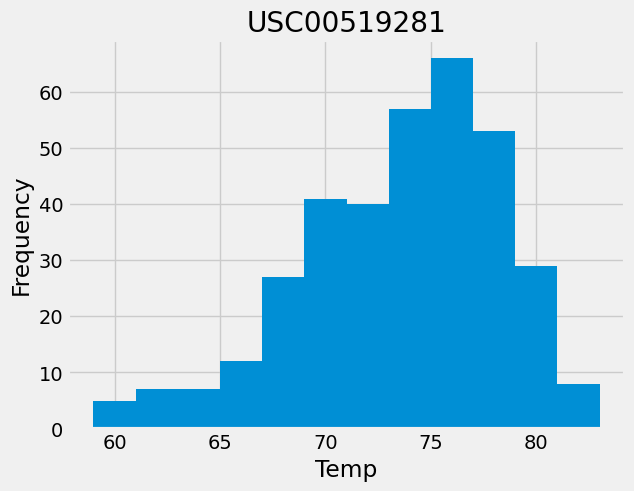

In [254]:
fig, ax = plt.subplots()
num_bins=12
n, bins, patches = ax.hist(temps_df, num_bins)
ax.set_xlabel('Temp')
ax.set_ylabel('Frequency')
ax.set_title('USC00519281')
plt.show()

# Close Session

In [252]:
# Close Session
session.close()